<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2023TeamB/blob/main/Auswertung_DWH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zweck**: Exploratory Data Analysis (EDA) und Testen der Hypothesen im DWH



# Importing Libraries

In [1]:
import pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Pfad des DWH
DB_DWH_PATH = "/content/drive/Shareddrives/DMA_2023_D/DMA2023TeamB/source_dbs/DWH_covid19.db"

# Verbindung zum DWH
dwh_conn = sqlite3.connect(DB_DWH_PATH)

In [5]:
# Liste der Tabellen im DWH
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('d_conditions',), ('d_devices',), ('d_medications',), ('d_procedures',), ('d_patients',), ('F_ANTICOVIS',)]


In [6]:
# Read sqlite query results into a pandas DataFrame
# demographic data
df_faktentabelle = pd.read_sql_query("SELECT * FROM F_ANTICOVIS", dwh_conn)

In [7]:
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
df_faktentabelle.head()

,patients_ID,conditions_code,procedures_code,devices_code,medications_code,medication_grading,course_of_Desease
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,36955009.0,261352009.0,0.0,0.0,0,1
1,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,386661006.0,261352009.0,0.0,0.0,0,1
2,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840539006.0,261352009.0,0.0,0.0,0,1
3,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840544004.0,261352009.0,0.0,0.0,0,1
4,2812f4fc-6aba-0033-728b-7e569bb8adcc,36955009.0,180325003.0,0.0,197604.0,0,5


In [8]:
# .shape returns the number of rows by the number of columns
#size of dataset
df_faktentabelle.shape

(608791, 7)

In [9]:
# .columns returns the name of all of your columns in the dataset.
df_faktentabelle.columns

Index(['patients_ID', 'conditions_code', 'procedures_code', 'devices_code',
       'medications_code', 'medication_grading', 'course_of_Desease'],
      dtype='object')

In [10]:
# attribute type
#df_faktentabelle.info()

In [11]:
#close db connection
dwh_conn.close()

In [12]:
# .nunique(axis=0) returns the number of unique values for each variable.
df_faktentabelle.nunique(axis=0)


patients_ID           1050
conditions_code         42
procedures_code         18
devices_code             7
medications_code        30
medication_grading       4
course_of_Desease        6
dtype: int64

In [13]:
# all_patients_have_covid = (df_faktentabelle['conditions_code'] == 840539006)
# print("All patients have COVID-19:", all_patients_have_covid)

In [14]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=b2b71ea8f6cfabf51c8574754b997d72cf8571e820ede2d52cfd701dcf9cd259
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


All Patients with COVID_19

In [15]:
from pandasql import sqldf

all_patients_that_had_covid = sqldf("""SELECT DISTINCT patients_id, conditions_code As Patients_With_Covid
                                                  FROM df_faktentabelle 
                                                  WHERE conditions_code = 840539006""")
all_patients_that_had_covid

,patients_ID,Patients_With_Covid
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa,840539006.0
1,2812f4fc-6aba-0033-728b-7e569bb8adcc,840539006.0
2,52a250a9-24e4-ec9b-91d6-c38cf1b10fc0,840539006.0
3,ad5525c0-fdab-94dc-018f-d7209c72bdef,840539006.0
4,7f30313f-98e9-2cc2-68a5-6f9973f9ad5a,840539006.0
...,...,...
860,75b6b10f-c734-8d73-fc30-cb2bf4ddddd0,840539006.0
861,179a1be3-2be7-a60d-2e02-d35e63b585d4,840539006.0
862,edab2899-dac4-a19d-59e2-a9bea7b95cab,840539006.0
863,4c523ab1-3255-911a-7eef-3bc3e48b7b05,840539006.0


All COVID_19 Patients that did not recieve an anticoagulation

In [16]:
all_COVID_19_Patients_That_did_not_Recieved_an_anticoagulation = sqldf("""SELECT DISTINCT patients_id As Patients_With_Covid 
                                                                  FROM df_faktentabelle 
                                                                  WHERE conditions_code = 840539006 AND medications_code = 0""")
all_COVID_19_Patients_That_did_not_Recieved_an_anticoagulation

,Patients_With_Covid
0,2f114e21-8b95-e9eb-2e9e-4b950b059cfa
1,52a250a9-24e4-ec9b-91d6-c38cf1b10fc0
2,7f30313f-98e9-2cc2-68a5-6f9973f9ad5a
3,b9f7feb0-45ac-55ed-4ee2-be12ad599416
4,2b2d8855-c163-3838-a719-995a3cefca33
...,...
678,34adbb99-9f87-5259-a8ee-4aec2a0d170b
679,b0a0046b-7664-5d33-5a1a-9a26fcf5bfb5
680,75b6b10f-c734-8d73-fc30-cb2bf4ddddd0
681,179a1be3-2be7-a60d-2e02-d35e63b585d4


All COVID_19 Patients that recieved an anticoagulation

In [ ]:
all_COVID_19_Patients_That_Recieved_an_anticoagulation = sqldf("""SELECT DISTINCT patients_id As Patients_With_Covid 
                                                                  FROM df_faktentabelle 
                                                                  WHERE conditions_code = 840539006 AND medications_code != 0""")

all_COVID_19_Patients_That_Recieved_an_anticoagulation

In [ ]:
import matplotlib.pyplot as plt

# Sort the values from 0 to 6
distinct_patients_and_course_of_desease = sqldf("""SELECT patients_id, max(course_of_desease)as course FROM df_faktentabelle
GROUP BY patients_id""")

distinct_patients_and_course_of_desease['course'].value_counts().sort_index().plot(kind='bar')

 # Add labels to the x and y axis
plt.xlabel('Severity of Disease')
plt.ylabel('Number of Unique Patients')

# # Show the plot
plt.show()
distinct_patients_and_course_of_desease

distinct patients and medications_grading

In [ ]:
distinct_patients_and_medications_grading = sqldf("""SELECT patients_id, max(medication_grading)as antikagulation FROM df_faktentabelle
GROUP BY patients_id""")
distinct_patients_and_medications_grading

distinct patients and covid

In [ ]:
from sqlalchemy.sql.expression import distinct
df_faktentabelle ['covid']= 0
df_faktentabelle
for i, row in df_faktentabelle.iterrows():
  if row.conditions_code == 840539006:
    df_faktentabelle.at[i, 'covid'] = 1
df_faktentabelle


In [ ]:
distinct_patients_and_covid_status = sqldf("""SELECT patients_id, max(covid) AS covid FROM df_faktentabelle
 GROUP BY patients_id""")
distinct_patients_and_covid_status

distinct patients, medicatons_grading, and course of desase and covid

In [ ]:
PMG = pd.merge(distinct_patients_and_course_of_desease,distinct_patients_and_medications_grading, on = "patients_ID" )
PMG["patients"]=PMG.index
PMG = pd.merge (PMG, distinct_patients_and_covid_status, on = 'patients_ID')
PMG

In [ ]:
covid_treated = sqldf("""SELECT * FROM PMG where covid = 1 and antikagulation > 0 """)
covid_treated

In [ ]:
covid_untreated = sqldf("""SELECT * FROM PMG where covid = 1 and antikagulation = 0 """)
covid_untreated

In [25]:
# Calculate the average severity for treated patients
avg_severity_in_patients_with_antikoagulation = covid_treated ['course'].mean()

## Calculate the average severity for untreated patients
avg_severity_in_patients_without_antikoagulation = covid_untreated ['course'].mean()

##Compare the average severity between treated and untreated patients
if avg_severity_in_patients_with_antikoagulation < avg_severity_in_patients_without_antikoagulation:
    print("The average severity of disease is lower in treated patients compared to untreated patients.")
elif avg_severity_in_patients_with_antikoagulation > avg_severity_in_patients_without_antikoagulation:
    print("The average severity of disease is higher in treated patients compared to untreated patients.")
else:
    print("The average severity of disease is the same in treated and untreated patients.")

The average severity of disease is higher in treated patients compared to untreated patients.


In [26]:
import scipy.stats as stats

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(covid_treated ['course'], covid_untreated ['course'], equal_var=False)

# Check if the p-value is less than 0.05
if p_value < 0.05:
    print("The difference in average severity between treated and untreated patients is statistically significant, the p-value is", p_value)
else:
    print("The difference in average severity between treated and untreated patients is not statistically significant, the p-value is", p_value)

The difference in average severity between treated and untreated patients is statistically significant, the p-value is 5.6266415502645845e-78


TypeError: ignored

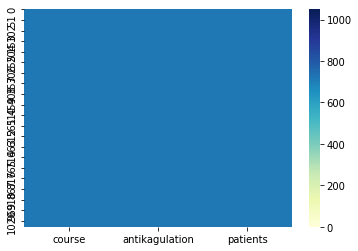

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_data = sqldf("""SELECT course, antikagulation, patients FROM PMG """)

# Create a pivot table
df_pivot = df_data.pivot('patients','antikagulation','course')

# Create a heatmap
sns.heatmap(df_data, cmap='YlGnBu')

# Show the plot
plt.show()